# **Imports & Libs**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import torch
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split

from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import math
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import numpy as np

from scipy.cluster.hierarchy import linkage, leaves_list

from sklearn.model_selection import KFold
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
RANDOM_SEED = 42


# **Data Analysis & Preprocessing**

### Data Analysis

In [2]:
data = arff.loadarff('adult.arff')
df = pd.DataFrame(data[0])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,b'State-gov',77516.0,b'Bachelors',13.0,b'Never-married',b'Adm-clerical',b'Not-in-family',b'White',b'Male',2174.0,0.0,40.0,b'United-States',b'<=50K'
1,50.0,b'Self-emp-not-inc',83311.0,b'Bachelors',13.0,b'Married-civ-spouse',b'Exec-managerial',b'Husband',b'White',b'Male',0.0,0.0,13.0,b'United-States',b'<=50K'
2,38.0,b'Private',215646.0,b'HS-grad',9.0,b'Divorced',b'Handlers-cleaners',b'Not-in-family',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
3,53.0,b'Private',234721.0,b'11th',7.0,b'Married-civ-spouse',b'Handlers-cleaners',b'Husband',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
4,28.0,b'Private',338409.0,b'Bachelors',13.0,b'Married-civ-spouse',b'Prof-specialty',b'Wife',b'Black',b'Female',0.0,0.0,40.0,b'Cuba',b'<=50K'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,b'Private',257302.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Tech-support',b'Wife',b'White',b'Female',0.0,0.0,38.0,b'United-States',b'<=50K'
32557,40.0,b'Private',154374.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
32558,58.0,b'Private',151910.0,b'HS-grad',9.0,b'Widowed',b'Adm-clerical',b'Unmarried',b'White',b'Female',0.0,0.0,40.0,b'United-States',b'<=50K'
32559,22.0,b'Private',201490.0,b'HS-grad',9.0,b'Never-married',b'Adm-clerical',b'Own-child',b'White',b'Male',0.0,0.0,20.0,b'United-States',b'<=50K'


### Decoding Byte strings to UTF-8

In [3]:
def try_decode(col):
    # For each column, if it holds byte‐strings (object dtype), decode to UTF-8;
    # otherwise leave it unchanged.
    return col.str.decode("utf-8") if col.dtype == "object" else col

# Apply the above function to each column of the DataFrame

df = df.apply(try_decode)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


### Categorical Encoding & Feature Scaling

In [4]:
# Identify categorical vs. numeric
cat_cols = df.select_dtypes(include='object').columns

# Encode all object-dtype cols in one go
ord_enc = OrdinalEncoder()
df.loc[:, cat_cols] = ord_enc.fit_transform(df[cat_cols])

category_mapping = {col: cats for col, cats in zip(cat_cols, ord_enc.categories_)}

# Scale everything into [0,1]
scaler = MinMaxScaler()
df.loc[:, :] = scaler.fit_transform(df)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.875,0.044302,0.6,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.021740,0.0,0.397959,0.95122,0.0
1,0.452055,0.75,0.048238,0.6,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95122,0.0
2,0.287671,0.5,0.138113,0.733333,0.533333,0.0,0.428571,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95122,0.0
3,0.493151,0.5,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95122,0.0
4,0.150685,0.5,0.221488,0.6,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.5,0.166404,0.466667,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95122,0.0
32557,0.315068,0.5,0.096500,0.733333,0.533333,0.333333,0.5,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95122,1.0
32558,0.561644,0.5,0.094827,0.733333,0.533333,1.0,0.071429,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95122,0.0
32559,0.068493,0.5,0.128499,0.733333,0.533333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95122,0.0


### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='income'),   # features
    df['income'],                # labels
    test_size=0.2,
    stratify=df['income'],
    random_state=RANDOM_SEED
)

In [6]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15738,0.205479,0.5,0.016928,0.6,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.448980,0.95122
27985,0.356164,0.5,0.060896,0.8,0.866667,0.666667,0.285714,0.2,1.0,0.0,0.000000,0.0,0.448980,0.95122
30673,0.041096,0.0,0.074679,0.733333,0.533333,0.666667,0.0,0.2,1.0,0.0,0.000000,0.0,0.275510,0.95122
9505,0.315068,0.25,0.008474,1.0,0.600000,0.0,1.0,0.8,1.0,1.0,0.068491,0.0,0.397959,0.95122
26417,0.095890,0.5,0.069037,0.6,0.800000,0.666667,0.714286,0.6,1.0,1.0,0.000000,0.0,0.397959,0.95122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,0.246575,0.75,0.113341,0.733333,0.533333,0.666667,0.857143,0.8,0.5,0.0,0.000000,0.0,0.377551,0.268293
20560,0.301370,0.5,0.278010,1.0,0.600000,0.0,0.785714,0.8,0.5,0.0,0.000000,0.0,0.295918,0.95122
23650,0.520548,0.5,0.047414,0.733333,0.533333,0.333333,0.285714,0.0,0.25,1.0,0.000000,0.0,0.551020,0.95122
25301,0.123288,0.5,0.025650,0.6,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.551020,0.95122


In [7]:
y_train

15738    1.0
27985    0.0
30673    0.0
9505     0.0
26417    0.0
        ... 
8003     0.0
20560    0.0
23650    0.0
25301    0.0
5800     0.0
Name: income, Length: 26048, dtype: object

# **GAN Architecture and Training Pipeline**

### Architecture & Train Functions

In [25]:

def build_generator(latent_dim, output_dim, hidden_size=128, dropout=0.0):
    """Build generator with configurable architecture"""
    model = nn.Sequential(
        nn.Linear(latent_dim, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(inplace=True),
        nn.Dropout(dropout),
        
        nn.Linear(hidden_size, hidden_size * 2),
        nn.BatchNorm1d(hidden_size * 2),
        nn.ReLU(inplace=True),
        nn.Dropout(dropout),

        nn.Linear(hidden_size * 2, output_dim),
        nn.Sigmoid()
    )
    return model

def build_discriminator(input_dim, hidden_size=128, dropout=0.3):
    """Build discriminator with raw logits and improved stability"""
    model = nn.Sequential(
        nn.Linear(input_dim, hidden_size * 2),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Dropout(dropout),
        
        nn.Linear(hidden_size * 2, hidden_size),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Dropout(dropout),

        nn.Linear(hidden_size, 1)
    )
    return model

def train_gan_epoch(generator, discriminator, dataloader, optimizer_G, optimizer_D, 
                    
                   criterion, latent_dim, device):
    """Train GAN for one epoch and return losses, to collect and return the average discriminator loss and generator loss over all batches."""
    generator.train()
    discriminator.train()
    
    d_losses = []
    g_losses = []
    
    for real_data, _ in dataloader:
        batch_size = real_data.size(0)
        real_data = real_data.to(device)
        
        # Labels
        bs = real_data.size(0)
        real_labels = torch.ones(bs, 1, device=device)
        fake_labels = torch.zeros(bs, 1, device=device)
        
        # Train Discriminator
        discriminator.zero_grad()
        
        # Real data loss
        real_output = discriminator(real_data)
        real_loss = criterion(real_output, real_labels)
        
        # Fake data loss
        noise = torch.randn(batch_size, latent_dim, device=device)
        fake_data = generator(noise)
        fake_output = discriminator(fake_data.detach())
        fake_loss = criterion(fake_output, fake_labels)
        
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()
        
        # Train Generator
        generator.zero_grad()
        fake_output = discriminator(fake_data)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        optimizer_G.step()
        
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())
    
    return np.mean(d_losses), np.mean(g_losses)

def create_tensors_from_dataframes(X_train, y_train, X_test, y_test):


    """
    Convert pandas DataFrames to PyTorch tensors and create TensorDatasets.
    
    Args:
        X_train, X_test: Feature DataFrames (float32)
        y_train, y_test: Label DataFrames (long for classification)
    
    Returns:
        tuple: (train_dataset, test_dataset, tensor_shapes)
    """
    # Force all columns to numeric type first
    X_train_clean = X_train.apply(pd.to_numeric, errors='coerce')
    X_test_clean = X_test.apply(pd.to_numeric, errors='coerce')

    # Convert to tensors
    train_features = torch.tensor(X_train_clean.values, dtype=torch.float32)
    test_features = torch.tensor(X_test_clean.values, dtype=torch.float32)
    train_labels = torch.tensor(pd.to_numeric(y_train.ravel(), errors='coerce'), dtype=torch.long)
    test_labels = torch.tensor(pd.to_numeric(y_test.ravel(), errors='coerce'), dtype=torch.long)
    
    print(f"Training features shape: {train_features.shape}")
    print(f"Training labels shape: {train_labels.shape}")

    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    
    return train_dataset, test_dataset

# Helper function that performs one discriminator update and one generator update, returning the two losses.
def train_step(generator, discriminator,
               optimizer_G, optimizer_D,
               criterion, latent_dim,
               real_data):
    device = real_data.device
    bs = real_data.size(0)

    # Prepare labels
    real_labels = torch.ones(bs, 1, device=device)
    fake_labels = torch.zeros(bs, 1, device=device)

    # === Discriminator ===
    discriminator.train()
    optimizer_D.zero_grad()
    real_pred = discriminator(real_data)
    real_loss = criterion(real_pred, real_labels)

    noise = torch.randn(bs, latent_dim, device=device)
    fake_data = generator(noise)
    fake_pred = discriminator(fake_data.detach())
    fake_loss = criterion(fake_pred, fake_labels)

    d_loss = real_loss + fake_loss
    d_loss.backward()
    optimizer_D.step()

    # === Generator ===
    generator.train()
    optimizer_G.zero_grad()
    gen_pred = discriminator(fake_data)
    g_loss = criterion(gen_pred, real_labels)   # trick discriminator
    g_loss.backward()
    optimizer_G.step()

    return d_loss, g_loss

# Custom weight initialization for stable GAN training
def init_weights(module):
    if isinstance(module, nn.Linear):
        # Initialize linear layers with a small normal distribution
        nn.init.normal_(module.weight, mean=0.0, std=0.02)
    elif isinstance(module, nn.BatchNorm1d):
        # BatchNorm: weights ~ N(1, 0.02), biases = 0
        nn.init.normal_(module.weight, mean=1.0, std=0.02)
        nn.init.constant_(module.bias, 0.0)

### Hyperparameters Optimazation 

In [ ]:
def evaluate_generator_quality(generator, real_data, latent_dim, device, n_samples=1000):
    """Evaluate generator quality using simple metrics"""
    generator.eval()
    
    with torch.no_grad():
        # Generate fake samples
        noise = torch.randn(n_samples, latent_dim, device=device)
        fake_data = generator(noise).cpu().numpy()
        real_data_sample = real_data[:n_samples].cpu().numpy()
        
        # Simple quality metrics
        # 1. Mean difference
        mean_diff = np.abs(np.mean(fake_data, axis=0) - np.mean(real_data_sample, axis=0))
        mean_score = 1.0 / (1.0 + np.mean(mean_diff))
        
        # 2. Standard deviation similarity
        std_fake = np.std(fake_data, axis=0)
        std_real = np.std(real_data_sample, axis=0)
        std_diff = np.abs(std_fake - std_real)
        std_score = 1.0 / (1.0 + np.mean(std_diff))
        
        # Combined score
        quality_score = (mean_score + std_score) / 2.0
        
    return quality_score

def objective(trial, train_dataset):
    """Optuna objective function"""
    # Suggest hyperparameters
    lr_G = trial.suggest_float('lr_G', 1e-5, 1e-2, log=True)
    lr_D = trial.suggest_float('lr_D', 1e-5, 1e-2, log=True)
    noise_dim = trial.suggest_int('noise_dim', 50, 200, log=True)
    hidden_size = trial.suggest_int('hidden_size', 64, 512, step=64)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    batch_size = trial.suggest_int('batch_size', 32, 256, step=32)
    
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"using {device}")
    
    # Get data dimensions from the passed dataset
    input_dim = train_dataset.tensors[0].shape[1]  # Number of features
    
    # Build models
    generator = build_generator(noise_dim, input_dim, hidden_size, dropout).to(device)
    discriminator = build_discriminator(input_dim, hidden_size, dropout).to(device)
    
    # Optimizers
    optimizer_G = optim.Adam(generator.parameters(), lr=lr_G, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_D, betas=(0.5, 0.999))
    
    # Loss function (uses logits directly for better numerical stability)
    criterion = nn.BCEWithLogitsLoss()

    # DataLoader
    dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Training
    n_epochs = 50  # Reduced for faster optimization
    best_quality = 0.0
    
    # Get a sample of real data for evaluation
    real_data_sample = train_dataset.tensors[0][:1000].to(device)
    
    try:
        for epoch in range(n_epochs):
            d_loss, g_loss = train_gan_epoch(generator, discriminator, dataloader, 
                                           optimizer_G, optimizer_D, criterion, 
                                           noise_dim, device)
            
            # Evaluate every 10 epochs
            if (epoch + 1) % 10 == 0:
                quality_score = evaluate_generator_quality(generator, real_data_sample, 
                                                         noise_dim, device)
                best_quality = max(best_quality, quality_score)
                
                # Report intermediate results for pruning
                trial.report(quality_score, epoch)
                
                # Check if trial should be pruned
                if trial.should_prune():
                    raise optuna.exceptions.TrialPruned()
    
    except Exception as e:
        print(f"Trial failed: {e}")
        return 0.0
    
    return best_quality

# Run optimization
def optimize_gan_hyperparameters(train_dataset, n_trials=100):
    """Run Optuna optimization"""
    # Create study
    study = optuna.create_study(
        direction='maximize',
        pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
    )
    
    # Optimize - pass train_dataset to objective function
    study.optimize(lambda trial: objective(trial, train_dataset), n_trials=n_trials, show_progress_bar=True)
    
    # Print results
    print("Best trial:")
    trial = study.best_trial
    print(f"  Quality Score: {trial.value:.4f}")
    print("  Best hyperparameters:")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    
    return study


######################
# Run Optuna Studies #
######################

# Convert to PyTorch tensors and create TensorDataset
train_dataset, test_dataset = create_tensors_from_dataframes(X_train, y_train, X_test, y_test)

# Use train_dataset in Optuna optimization
study = optimize_gan_hyperparameters(train_dataset, n_trials=50)

# Get best hyperparameters
best_params = study.best_trial.params
print("\nOptimal hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


[I 2025-07-04 17:38:39,965] A new study created in memory with name: no-name-97edea00-93c9-46a6-ad1f-7066246df3ce


  0%|          | 0/50 [00:00<?, ?it/s]

using cuda
[I 2025-07-04 17:39:39,551] Trial 0 finished with value: 0.9832130840630539 and parameters: {'lr_G': 0.0006497916650845984, 'lr_D': 0.001166757127353692, 'noise_dim': 78, 'hidden_size': 192, 'dropout': 0.1937468375560914, 'batch_size': 128}. Best is trial 0 with value: 0.9832130840630539.
using cuda
[I 2025-07-04 17:40:09,534] Trial 1 finished with value: 0.9759398304338418 and parameters: {'lr_G': 0.005849772650053965, 'lr_D': 0.003438928471880128, 'noise_dim': 90, 'hidden_size': 320, 'dropout': 0.0435233090580896, 'batch_size': 192}. Best is trial 0 with value: 0.9832130840630539.
using cuda
[I 2025-07-04 17:40:40,348] Trial 2 finished with value: 0.9098428778958247 and parameters: {'lr_G': 3.869552194818296e-05, 'lr_D': 0.007206074156964383, 'noise_dim': 96, 'hidden_size': 512, 'dropout': 0.38941059292636065, 'batch_size': 224}. Best is trial 0 with value: 0.9832130840630539.
using cuda
[I 2025-07-04 17:43:00,496] Trial 3 finished with value: 0.9780721183806566 and parame

##### Results Analysis

In [15]:
# Optional: Plot optimization history
try:
    import plotly
    optuna.visualization.plot_optimization_history(study).show()
    optuna.visualization.plot_param_importances(study).show()
except ImportError:
    print("Install plotly for visualization: pip install plotly")

### Train

In [ ]:
###########################################################
# Model Initialization with Optuna's Best Hyperparameters #
###########################################################
noise_dim    = best_params['noise_dim']
hidden_size  = best_params['hidden_size']
dropout      = best_params['dropout']
batch_size   = best_params['batch_size']
lr_G         = best_params['lr_G']
lr_D         = best_params['lr_D']
num_epochs   = 100


num_features = X_train.shape[1]    # dimensionality of each data sample

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Models (with tuned hidden-size & dropout)
generator   = build_generator(noise_dim, num_features,
                                hidden_size=hidden_size,
                                dropout=dropout).to(device)
discriminator = build_discriminator(num_features,
                                    hidden_size=hidden_size,
                                    dropout=dropout).to(device)
# Weight init
generator.apply(init_weights)
discriminator.apply(init_weights)

# Optimizers (with the same betas you used in Optuna)
optimizer_G = optim.Adam(generator.parameters(),
                         lr=lr_G, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(),
                         lr=lr_D, betas=(0.5, 0.999))

# Loss
adversarial_loss = nn.BCEWithLogitsLoss()

################
# Data Loading #
################
# DataLoader
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
train_dataset, test_dataset = create_tensors_from_dataframes(X_train, y_train, X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


###########################
# Adversarial Training Loop
###########################
"""
This training loop orchestrates multiple epochs (by calling train_gan_epoch, which calls train_step repeatedly), moves data to GPU, logs and averages losses per epoch, and prints progress. 
This way can:
    1. Recompute averages per epoch
    2. Plot epoch-level metrics
    3. Adjust learning rates or early‐stop
    4. Save checkpoints
"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set up the optimizers
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)

discriminator = discriminator.to(device)
generator = generator.to(device)
# # Loss function
# criterion = nn.BCEWithLogitsLoss()

# Lists to track the losses
d_losses = []
g_losses = []

# Training Loop
for epoch in range(num_epochs):
    for real_data, _ in train_loader:
        real_data = real_data.to(device)

        # Train step (no batch_size; step now infers bs internally)
        d_loss, g_loss = train_step(
            generator, discriminator,
            optimizer_G, optimizer_D,
            adversarial_loss, noise_dim,
            real_data
        )
        
        # Save losses for plotting
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())
    
    # Print the average losses at the end of the epoch
    avg_d = sum(d_losses[-len(train_loader):]) / len(train_loader)
    avg_g = sum(g_losses[-len(train_loader):]) / len(train_loader)
    print(f"Epoch {epoch}: D Loss: {avg_d:.4f}, G Loss: {avg_g:.4f}")


#############
# Save Models
#############
# Put models in eval mode (optional, but recommended before saving)
generator.eval()
discriminator.eval()

# Save state dicts
torch.save(generator.state_dict(), f"seed{RANDOM_SEED}/GAN_generator.pth")
torch.save(discriminator.state_dict(), f"seed{RANDOM_SEED}/GAN_discriminator.pth")


/tmp/ipykernel_4118806/780555244.py:102: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

/tmp/ipykernel_4118806/780555244.py:103: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Training features shape: torch.Size([26048, 14])
Training labels shape: torch.Size([26048])
Using device: cuda
Epoch 0: D Loss: 1.3735, G Loss: 0.6993
Epoch 1: D Loss: 1.3803, G Loss: 0.7162
Epoch 2: D Loss: 1.3728, G Loss: 0.7075
Epoch 3: D Loss: 1.3609, G Loss: 0.7398
Epoch 4: D Loss: 1.3515, G Loss: 0.7320
Epoch 5: D Loss: 1.3388, G Loss: 0.7518
Epoch 6: D Loss: 1.3626, G Loss: 0.7065
Epoch 7: D Loss: 1.3289, G Loss: 0.7371
Epoch 8: D Loss: 1.3601, G Loss: 0.7569
Epoch 9: D Loss: 1.3720, G Loss: 0.7244
Epoch 10: D Loss: 1.4010, G Loss: 0.6953
Epoch 11: D Loss: 1.3617, G Loss: 0.7111
Epoch 12: D Loss: 1.3342, G Loss: 0.7525
Epoch 13: D Loss: 1.3223, G Loss: 0.7425
Epoch 14: D Loss: 1.3043, G Loss: 0.7734
Epoch 15: D Loss: 1.3273, G Loss: 0.7471
Epoch 16: D Loss: 1.3159, G Loss: 0.7702
Epoch 17: D Loss: 1.3177, G Loss: 0.7839
Epoch 18: D Loss: 1.3496, G Loss: 0.7733
Epoch 19: D Loss: 1.3036, G Loss: 0.7858
Epoch 20: D Loss: 1.2812, G Loss: 0.7530
Epoch 21: D Loss: 1.4229, G Loss: 0.74

##### Results Analysis

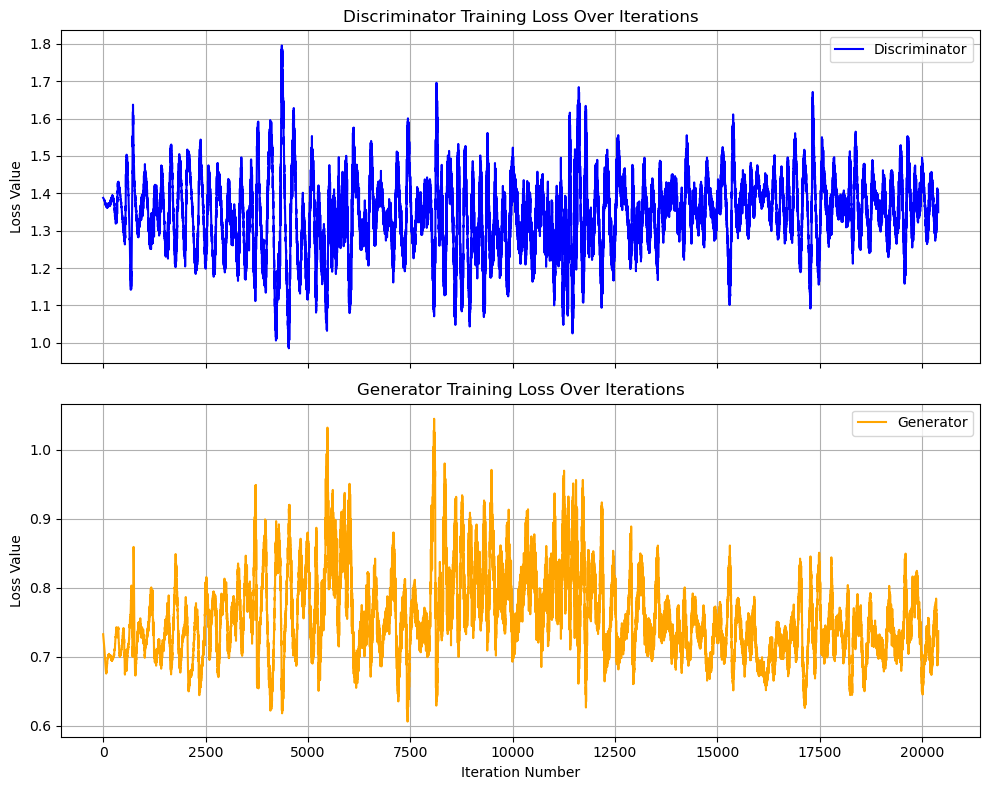

In [27]:
# Initialize figure with two stacked subplots for loss curves
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Discriminator loss curve
axs[0].plot(d_losses, label="Discriminator", color="blue")
axs[0].set_title("Discriminator Training Loss Over Iterations")
axs[0].set_ylabel("Loss Value")
axs[0].legend()
axs[0].grid(True)

# Generator loss curve
axs[1].plot(g_losses, label="Generator", color="orange")
axs[1].set_title("Generator Training Loss Over Iterations")
axs[1].set_xlabel("Iteration Number")
axs[1].set_ylabel("Loss Value")
axs[1].legend()
axs[1].grid(True)

# Adjust spacing for clarity
plt.tight_layout()
plt.show()



# **cGAN Architecture and Training Pipeline**

The conditional GAN architecture is very similar to the standard GAN, but the generator receives another “instruction”, specifying what is the desired label of the generated sample. This instruction, represented as one-hot encoding, is concatenated to the noise provided to the generator as input. The discriminator also receives this instruction, along with the real and synthetic samples. The real sample’s label needs to be like the one required by the instruction.

### Architecture & Train Functions

In [15]:
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim, num_classes, hidden_size=128, dropout=0.0):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.num_classes = num_classes

        # Updated model to accept concatenated noise + label with configurable architecture
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size * 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size * 2, output_dim),
            nn.Sigmoid()  
            # Sigmoid bounds each generated feature to [0,1] so that synthetic samples live in the same scaled space as the real data.
        )

    def forward(self, noise, labels):
        # One-hot encode labels if not already one-hot
        labels_one_hot = torch.nn.functional.one_hot(labels, self.num_classes).float()

        # Concatenate noise and label embeddings
        gen_input = torch.cat((noise, labels_one_hot), dim=1)  # Shape: (batch_size, latent_dim + num_classes)
        return self.model(gen_input)

class Discriminator(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_size=128, dropout=0.0):
        super(Discriminator, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes

        # Updated model to accept concatenated data + label with configurable architecture
        self.model = nn.Sequential(
            nn.Linear(input_dim + num_classes, hidden_size * 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size * 2, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, data, labels):
        # One-hot encode labels if not already one-hot
        labels_one_hot = torch.nn.functional.one_hot(labels, self.num_classes).float()

        # Concatenate data and label embeddings
        d_input = torch.cat((data, labels_one_hot), dim=1)  # Shape: (batch_size, input_dim + num_classes)
        return self.model(d_input)
    
def train_step_cgan(generator, discriminator, optimizer_G, optimizer_D,
                criterion, latent_dim, real_data, labels):
    device = real_data.device
    bs = real_data.size(0)

    # FIXED: Label smoothing for stability
    real_targets = torch.ones(bs, 1, device=device) * 0.9  # Instead of 1.0
    fake_targets = torch.zeros(bs, 1, device=device) + 0.1  # Instead of 0.0

    # Discriminator update
    discriminator.train()
    optimizer_D.zero_grad()
    
    real_pred = discriminator(real_data, labels)
    real_loss = criterion(real_pred, real_targets)
    
    noise = torch.randn(bs, latent_dim, device=device)
    fake_data = generator(noise, labels)
    fake_pred = discriminator(fake_data.detach(), labels)
    fake_loss = criterion(fake_pred, fake_targets)
    
    d_loss = (real_loss + fake_loss) / 2  # Average instead of sum
    d_loss.backward()
    
    # FIXED: Gradient clipping
    torch.nn.utils.clip_grad_norm_(discriminator.parameters(), max_norm=1.0)
    optimizer_D.step()

    # Generator update
    generator.train()
    optimizer_G.zero_grad()
    
    gen_pred = discriminator(fake_data, labels)
    g_loss = criterion(gen_pred, torch.ones(bs, 1, device=device))  # No smoothing for G
    g_loss.backward()
    
    # FIXED: Gradient clipping
    torch.nn.utils.clip_grad_norm_(generator.parameters(), max_norm=1.0)
    optimizer_G.step()

    return d_loss, g_loss

def create_cgan_datasets(X_train, y_train, X_test, y_test):
    """
    Convert DataFrames to torch Tensors and create TensorDatasets for a cGAN,
    with missing‐value removal. Returns (train_dataset, test_dataset, num_classes).
    """
    # 1) Coerce all columns to numeric, invalid → NaN
    X_train_num = X_train.apply(pd.to_numeric, errors='coerce')
    X_test_num  = X_test.apply(pd.to_numeric, errors='coerce')
    y_train_num = pd.to_numeric(y_train, errors='coerce')
    y_test_num  = pd.to_numeric(y_test,  errors='coerce')

    # 2) Drop any samples with NaNs in either features or label
    train_df = pd.concat([X_train_num, y_train_num.rename('label')], axis=1).dropna()
    test_df  = pd.concat([X_test_num,  y_test_num.rename('label')], axis=1).dropna()

    # 3) Separate cleaned features and labels
    X_train_clean = train_df.drop('label', axis=1)
    y_train_clean = train_df['label']
    X_test_clean  = test_df.drop('label', axis=1)
    y_test_clean  = test_df['label']

    # 4) Convert to tensors
    train_features = torch.tensor(X_train_clean.values.astype(np.float32))
    train_labels   = torch.tensor(y_train_clean.values.astype(np.int64), dtype=torch.long)
    test_features  = torch.tensor(X_test_clean.values.astype(np.float32))
    test_labels    = torch.tensor(y_test_clean.values.astype(np.int64), dtype=torch.long)

    # 5) Compute number of classes for conditioning
    num_classes = int(train_labels.max().item() + 1)

    # 6) Build TensorDatasets
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset  = TensorDataset(test_features,  test_labels)

    print(f"Train features: {train_features.shape}, Train labels: {train_labels.shape}")
    print(f"Test  features: {test_features.shape},  Test labels:  {test_labels.shape}")
    print(f"Num classes: {num_classes}")

    return train_dataset, test_dataset, num_classes


### Hyperparameters Optimization

In [12]:
################################
# Optuna Hyperparameter Search #
################################

def objective(trial, train_dataset, num_classes):
    # suggestions
    lr_G = trial.suggest_float('lr_G', 1e-6, 1e-1)
    lr_D = trial.suggest_float('lr_D', 1e-6, 1e-1)
    hidden_size = trial.suggest_int('hidden_size', 64, 512, step=64)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256])
    latent_dim = trial.suggest_int('latent_dim', 32, 128)
    epochs = 50

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    input_dim = train_dataset.tensors[0].shape[1]

    # build models
    G = Generator(latent_dim, input_dim, num_classes,
                  hidden_size=hidden_size, dropout=dropout).to(device)
    D = Discriminator(input_dim, num_classes,
                      hidden_size=hidden_size, dropout=dropout).to(device)

    opt_G = optim.Adam(G.parameters(), lr=lr_G, betas=(0.5, 0.999))
    opt_D = optim.Adam(D.parameters(), lr=lr_D, betas=(0.5, 0.999))
    criterion = nn.BCEWithLogitsLoss()

    loader = DataLoader(train_dataset, batch_size=batch_size,
                        shuffle=True, drop_last=True)

    best_score = 0.0
    for epoch in range(epochs):
        for real_data, labels in loader:
            real_data, labels = real_data.to(device), labels.to(device)
            bs = real_data.size(0)
            real_y = torch.ones(bs, 1, device=device)
            fake_y = torch.zeros(bs, 1, device=device)

            # -- D step --
            opt_D.zero_grad()
            real_pred = D(real_data, labels)
            real_loss = criterion(real_pred, real_y)
            noise = torch.randn(bs, latent_dim, device=device)
            fake_data = G(noise, labels)
            fake_pred = D(fake_data.detach(), labels)
            fake_loss = criterion(fake_pred, fake_y)
            d_loss = real_loss + fake_loss
            d_loss.backward()
            opt_D.step()

            # -- G step --
            opt_G.zero_grad()
            gen_pred = D(fake_data, labels)
            g_loss = criterion(gen_pred, real_y)
            g_loss.backward()
            opt_G.step()

        # evaluation: simple metric = discriminator on fake
        with torch.no_grad():
            noise = torch.randn(bs, latent_dim, device=device)
            fake_data = G(noise, labels)
            score = D(fake_data, labels).mean().item()
            best_score = max(best_score, score)
            trial.report(best_score, epoch)
            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

    return best_score

In [13]:
# Assume X_train (DataFrame) and y_train (Series) are already defined

# 1) Convert features and labels to numeric, coercing invalid entries to NaN
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
y_train_numeric = pd.to_numeric(y_train, errors='coerce')

# 2) Combine into one DataFrame and drop rows with any NaNs
df_train = pd.concat([X_train_numeric, y_train_numeric.rename('label')], axis=1)
df_train = df_train.dropna()

# 3) Separate cleaned features and labels
X_clean = df_train.drop('label', axis=1)
y_clean = df_train['label']

# 4) Convert to PyTorch tensors
train_features = torch.tensor(X_clean.values.astype(np.float32), dtype=torch.float32)
train_labels   = torch.tensor(y_clean.astype(np.int64).values,      dtype=torch.long)

# 5) Determine number of classes for conditioning
num_classes = len(torch.unique(train_labels))

# 6) Create TensorDataset and DataLoader
train_dataset = TensorDataset(train_features, train_labels)
batch_size = 128  # or use tuned/searchable value
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 7) Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(lambda t: objective(t, train_dataset, num_classes),
               n_trials=100)
print('Best hyperparameters:', study.best_params)



[I 2025-07-05 09:50:40,515] A new study created in memory with name: no-name-1dd6c462-f584-450b-886d-b98c83a8096e


[I 2025-07-05 09:52:06,834] Trial 0 finished with value: 0.0 and parameters: {'lr_G': 0.07762691446100067, 'lr_D': 0.057921528071603376, 'hidden_size': 128, 'dropout': 0.3181349566538818, 'batch_size': 64, 'latent_dim': 96}. Best is trial 0 with value: 0.0.
[I 2025-07-05 09:52:53,067] Trial 1 finished with value: 0.00047430465929210186 and parameters: {'lr_G': 0.03939615197566838, 'lr_D': 0.04004967411787523, 'hidden_size': 256, 'dropout': 0.04301925118810124, 'batch_size': 128, 'latent_dim': 84}. Best is trial 1 with value: 0.00047430465929210186.
[I 2025-07-05 09:54:19,787] Trial 2 finished with value: 0.0 and parameters: {'lr_G': 0.05244339059700581, 'lr_D': 0.070732041331098, 'hidden_size': 192, 'dropout': 0.49400455294563816, 'batch_size': 64, 'latent_dim': 75}. Best is trial 1 with value: 0.00047430465929210186.
[I 2025-07-05 09:55:45,254] Trial 3 finished with value: 0.0 and parameters: {'lr_G': 0.046284096989377195, 'lr_D': 0.0012360377118061185, 'hidden_size': 64, 'dropout': 0

Best hyperparameters: {'lr_G': 0.0003549163971082042, 'lr_D': 0.012279608075500067, 'hidden_size': 320, 'dropout': 0.1550080307817466, 'batch_size': 128, 'latent_dim': 51}


In [20]:
study.best_params
# Optional: Plot optimization history
try:
    import plotly
    optuna.visualization.plot_optimization_history(study).show()
    optuna.visualization.plot_param_importances(study).show()
except ImportError:
    print("Install plotly for visualization: pip install plotly")

### Train

In [18]:
###########################################################
# Model Initialization with Optuna's Best Hyperparameters #
###########################################################

# Hyperparameters (from Optuna for cGAN)
noise_dim    = study.best_params['latent_dim']
hidden_size  = study.best_params['hidden_size']
dropout      = study.best_params['dropout']
batch_size   = study.best_params['batch_size']
lr_G         = study.best_params['lr_G']
lr_D         = study.best_params['lr_D']
num_epochs   = 100

num_features = X_train.shape[1]    # dimensionality of each data sample

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Models (with tuned hidden-size & dropout)
generator = Generator(
    latent_dim=noise_dim,
    output_dim=num_features,
    num_classes=num_classes,
    hidden_size=hidden_size,
    dropout=dropout
).to(device)

discriminator = Discriminator(
    input_dim=num_features,
    num_classes=num_classes,
    hidden_size=hidden_size,
    dropout=dropout
).to(device)

# Custom weight initialization for stable GAN training
def init_weights(module):
    if isinstance(module, nn.Linear):
        nn.init.normal_(module.weight, mean=0.0, std=0.02)
    elif isinstance(module, nn.BatchNorm1d):
        nn.init.normal_(module.weight, mean=1.0, std=0.02)
        nn.init.constant_(module.bias, 0.0)

generator.apply(init_weights)
discriminator.apply(init_weights)

# Optimizers (with the same betas you used in Optuna)
optimizer_G = optim.Adam(generator.parameters(),
                         lr=lr_G, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(),
                         lr=lr_D, betas=(0.5, 0.999))

# Loss
adversarial_loss = nn.BCEWithLogitsLoss()


################
# Data Loading #
################

# DataLoader
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          drop_last=True)  # ensures full-size batches


# Usage
train_dataset, test_dataset, num_classes = create_cgan_datasets(
    X_train, y_train, X_test, y_test
)

# DataLoaders (drop_last ensures every batch is exactly `batch_size`)
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

###########################
# Adversarial Training Loop
###########################
# Trackers
d_losses, g_losses = [], []

# Training Loop
for epoch in range(num_epochs):
    for real_data, labels in train_loader:
        # send both data and labels to device
        real_data = real_data.to(device)
        labels    = labels.to(device)

        # one cGAN step
        d_loss, g_loss = train_step_cgan(
            generator, discriminator,
            optimizer_G, optimizer_D,
            adversarial_loss, noise_dim,
            real_data, labels
        )
        
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())
    
    avg_d = sum(d_losses[-len(train_loader):]) / len(train_loader)
    avg_g = sum(g_losses[-len(train_loader):]) / len(train_loader)
    print(f"Epoch {epoch+1:3d} — D Loss: {avg_d:.4f}, G Loss: {avg_g:.4f}")



Train features: torch.Size([26048, 14]), Train labels: torch.Size([26048])
Test  features: torch.Size([6513, 14]),  Test labels:  torch.Size([6513])
Num classes: 2
Epoch   1 — D Loss: 0.5678, G Loss: 1.2424
Epoch   2 — D Loss: 0.5698, G Loss: 1.1953
Epoch   3 — D Loss: 0.6033, G Loss: 1.0659
Epoch   4 — D Loss: 0.6122, G Loss: 1.0051
Epoch   5 — D Loss: 0.6293, G Loss: 0.9663
Epoch   6 — D Loss: 0.6433, G Loss: 0.8921
Epoch   7 — D Loss: 0.6524, G Loss: 0.8722
Epoch   8 — D Loss: 0.6318, G Loss: 0.9413
Epoch   9 — D Loss: 0.6106, G Loss: 1.0135
Epoch  10 — D Loss: 0.5997, G Loss: 1.0517
Epoch  11 — D Loss: 0.5987, G Loss: 1.0605
Epoch  12 — D Loss: 0.6039, G Loss: 1.0515
Epoch  13 — D Loss: 0.6050, G Loss: 1.0612
Epoch  14 — D Loss: 0.6029, G Loss: 1.0473
Epoch  15 — D Loss: 0.6049, G Loss: 1.0503
Epoch  16 — D Loss: 0.6034, G Loss: 1.0442
Epoch  17 — D Loss: 0.5986, G Loss: 1.0643
Epoch  18 — D Loss: 0.5891, G Loss: 1.1188
Epoch  19 — D Loss: 0.5855, G Loss: 1.1404
Epoch  20 — D Loss:

In [ ]:
torch.save(generator.state_dict(), f"seed{RANDOM_SEED}/cGAN_generator.pth")
torch.save(discriminator.state_dict(), f"seed{RANDOM_SEED}/cGAN_discriminator.pth")

### Results Analysis

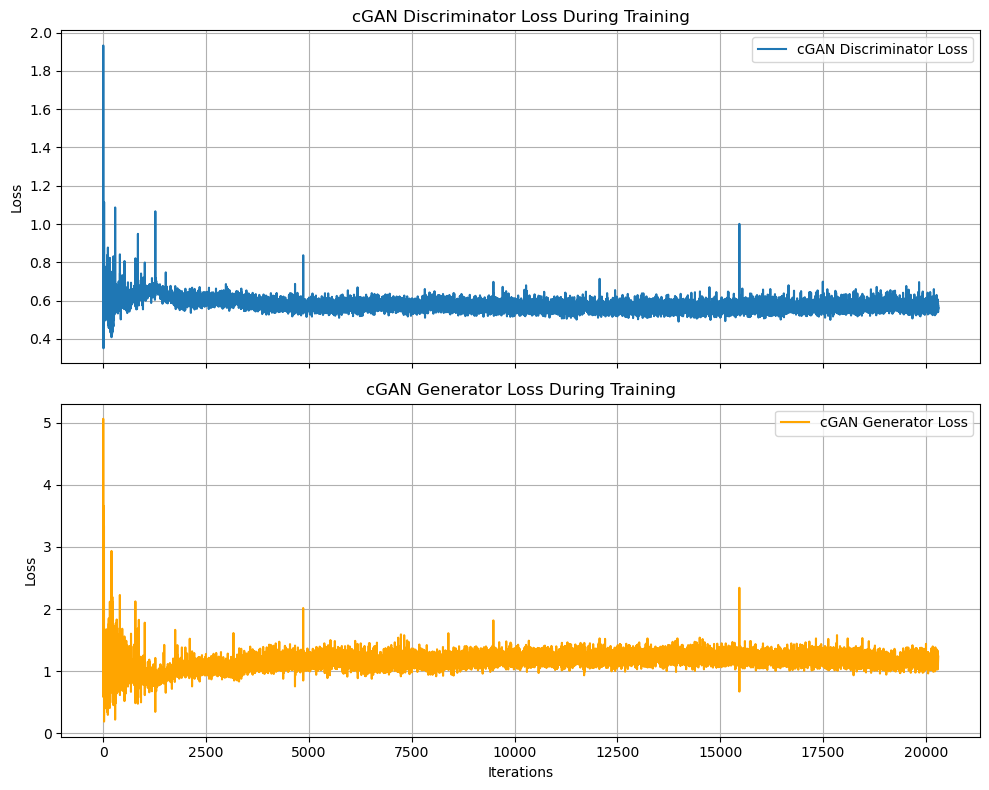

In [19]:
# Create two subplots: one for cGAN discriminator loss, one for cGAN generator loss
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot cGAN Discriminator Loss
axs[0].plot(d_losses, label="cGAN Discriminator Loss")
axs[0].set_title("cGAN Discriminator Loss During Training")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# Plot cGAN Generator Loss
axs[1].plot(g_losses, label="cGAN Generator Loss", color="orange")
axs[1].set_title("cGAN Generator Loss During Training")
axs[1].set_xlabel("Iterations")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid(True)

# Adjust layout for better readability
plt.tight_layout()
plt.show()
# Save state dicts


# **Data Synthesis**

### Synthesis    

##### Synthesis Functions

In [28]:
def generate_balanced_labels(real_labels, num_samples, device):
    """
    Generates synthetic labels with the same proportion as real_labels.
    Handles both pandas Series and numpy arrays, and converts object types to numeric.
    
    Args:
        real_labels: The reference labels (pandas Series, numpy array, or torch tensor)
        num_samples (int): Number of synthetic labels to generate
        device (torch.device): The device (CPU/GPU) where the tensor should be created

    Returns:
        torch.Tensor: A tensor of sampled labels with the same class distribution
    """
    
    # Convert to numeric if needed
    if isinstance(real_labels, pd.Series):
        # Convert pandas Series to numeric, handling object dtypes
        real_labels_numeric = pd.to_numeric(real_labels, errors='coerce').values
    elif isinstance(real_labels, np.ndarray):
        # Convert numpy array to numeric if it's object dtype
        if real_labels.dtype == 'object':
            real_labels_numeric = pd.to_numeric(real_labels, errors='coerce')
        else:
            real_labels_numeric = real_labels
    elif isinstance(real_labels, torch.Tensor):
        real_labels_numeric = real_labels.cpu().numpy()
    else:
        # Try to convert to numeric
        real_labels_numeric = pd.to_numeric(real_labels, errors='coerce')
    
    # Remove any NaN values that might have been created during conversion
    real_labels_numeric = real_labels_numeric[~np.isnan(real_labels_numeric)]
    
    # Convert to torch tensor
    real_labels_tensor = torch.tensor(real_labels_numeric, dtype=torch.long)
    
    # Get class distribution
    unique_classes, counts = torch.unique(real_labels_tensor, return_counts=True)
    class_probs = counts.float() / counts.sum()
    
    print(f"Class distribution: {dict(zip(unique_classes.tolist(), class_probs.tolist()))}")
    
    # Sample based on computed probabilities
    sampled_indices = torch.multinomial(class_probs, num_samples, replacement=True)
    sampled_labels = unique_classes[sampled_indices]
    
    return sampled_labels.to(device)

def generate_cgan_synthetic_data(generator, num_samples, noise_dim, y_train, 
                                X_train_columns, device):
    """
    Complete function to generate synthetic data using cGAN
    
    Args:
        generator: Trained cGAN generator
        num_samples: Number of samples to generate
        noise_dim: Dimension of noise vector
        y_train: Original training labels for distribution matching
        X_train_columns: Column names for the output DataFrame
        device: Device for computation
    
    Returns:
        synthetic_data: DataFrame with synthetic features
        synthetic_labels: Series with synthetic labels
    """
    
    generator.eval()  # Set to evaluation mode
    
    with torch.no_grad():
        # Generate balanced labels
        labels = generate_balanced_labels(y_train, num_samples, device)
        
        # Create noise vector
        noise = torch.randn(num_samples, noise_dim).to(device)
        
        # Generate synthetic data
        synthetic_data_tensor = generator(noise, labels)
        
        # Convert to CPU and create DataFrame
        synthetic_data = synthetic_data_tensor.detach().cpu()
        synthetic_data_df = pd.DataFrame(synthetic_data.numpy(), columns=X_train_columns)
        
        # Create labels Series
        synthetic_labels_series = pd.Series(labels.cpu().numpy(), name='income')
    
    return synthetic_data_df, synthetic_labels_series

##### Data Synthesis

In [32]:
######################
# GAN Data Synthesis #
######################
# Generate synthetic data using the trained GAN generator
num_samples = X_train.shape[0]

# Compute of original class proportions over the full training set
if isinstance(y_train, torch.Tensor):
    original_labels = y_train.cpu().numpy()
else:
    original_labels = pd.to_numeric(y_train, errors='coerce').values

unique_labels, counts = np.unique(original_labels, return_counts=True)
class_distribution = counts / len(original_labels)

print(f"Original class distribution: {dict(zip(unique_labels, class_distribution))}")

# load GAN generator
# 1) Match the exact hyperparameters used when training
latent_dim  = 73        
output_dim  = X_train.shape[1]
hidden_size = 64
dropout     = 0.049497870013695836

# 2) Rebuild the generator
gan_generator = build_generator(latent_dim, output_dim, hidden_size, dropout)

# 3) Load the saved checkpoint
checkpoint = torch.load(
    f"seed{RANDOM_SEED}/GAN_generator.pth",
    map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
gan_generator.load_state_dict(checkpoint)

# 4) Send to device and switch to eval mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gan_generator.to(device).eval()
print("GAN Generator loaded and ready for inference.")
# Generate samples for each class
all_synthetic_data = []
all_synthetic_labels = []
gan_generator.eval()
with torch.no_grad():
    for class_idx in range(num_classes):
        # Calculate how many samples for this class
        samples_for_class = int(num_samples * class_distribution[class_idx])
        
        if samples_for_class > 0:
            # Generate noise
            noise = torch.randn(samples_for_class, noise_dim).to(device)
            
            # Create labels for this class
            labels = torch.full((samples_for_class,), class_idx, dtype=torch.long, device=device)
            
            # Generate synthetic data
            synthetic_batch = gan_generator(noise)
            
            all_synthetic_data.append(synthetic_batch.cpu())
            all_synthetic_labels.extend([class_idx] * samples_for_class)

# Combine all data
synthetic_data_tensor = torch.cat(all_synthetic_data, dim=0)
synthetic_regular_dataset = pd.DataFrame(synthetic_data_tensor.numpy(), columns=X_train.columns)
synthetic_labels = pd.Series(all_synthetic_labels, name='income')

# Shuffle to mix classes
indices = np.random.permutation(len(synthetic_regular_dataset))
synthetic_regular_dataset = synthetic_regular_dataset.iloc[indices].reset_index(drop=True)
synthetic_labels = synthetic_labels.iloc[indices].reset_index(drop=True)


print("=== Data Synthesis using GAN ===")
print(f"Generated {len(synthetic_regular_dataset)} synthetic samples")
print(f"Label distribution: {synthetic_labels.value_counts().sort_index()}")


#######################
# cGAN Data Synthesis #
#######################
# 1) Specify the same architecture parameters we used for training
latent_dim   = 51         # same as best_params['latent_dim']
output_dim   = X_train.shape[1]   # number of features
num_classes  = 2          # e.g. income <=50K vs >50K
hidden_size  = 320        # best_params['hidden_size']
dropout      = 0.1550080307817466  # best_params['dropout']

# 2) Instantiate the model
cgan_generator = Generator(
    latent_dim=latent_dim,
    output_dim=output_dim,
    num_classes=num_classes,
    hidden_size=hidden_size,
    dropout=dropout
)

# 3) Load the saved state dict
checkpoint = torch.load(
      f"seed{RANDOM_SEED}/cGAN_generator.pth",
    map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
cgan_generator.load_state_dict(checkpoint)

# 4) Move to device and switch to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cgan_generator.to(device).eval()

print("cGAN Generator loaded and ready for inference.")

print("=== Data Synthesis using cGAN ===")
synthetic_conditional_dataset, synthetic_conditional_labels = generate_cgan_synthetic_data(
    generator=cgan_generator,  
    num_samples=X_train.shape[0],
    noise_dim=latent_dim,
    y_train=y_train,
    X_train_columns=X_train.columns,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

print(f"Generated {len(synthetic_conditional_dataset)} samples")
print(f"Label distribution: {synthetic_conditional_labels.value_counts()}")
print(f"Synthetic data shape: {synthetic_conditional_dataset.shape}")

Original class distribution: {0.0: 0.7591753685503686, 1.0: 0.24082463144963145}
GAN Generator loaded and ready for inference.
=== Data Synthesis using GAN ===
Generated 26048 synthetic samples
Label distribution: income
0    19775
1     6273
Name: count, dtype: int64
cGAN Generator loaded and ready for inference.
=== Data Synthesis using cGAN ===
Class distribution: {0: 0.7591753602027893, 1: 0.2408246248960495}
Generated 26048 samples
Label distribution: income
0    19720
1     6328
Name: count, dtype: int64
Synthetic data shape: (26048, 14)


### Post-Processing of Categorical Features to Valid Integer Codes

In [34]:
for col in cat_cols:
    if col == 'income':
        continue

    # Get valid class indices for the column
    unique_classes = np.arange(len(category_mapping[col])).reshape(-1, 1)

    # Scale class indices to match the MinMax-scaled synthetic data
    unique_classes = MinMaxScaler().fit_transform(unique_classes).flatten()

    # Get synthetic values
    synthetic_values = synthetic_regular_dataset[col].to_numpy()

    # Find closest valid class value for each synthetic value
    closest_values = [
        unique_classes[np.abs(unique_classes - val).argmin()]
        for val in synthetic_values
    ]

    # Assign back to the dataset
    synthetic_regular_dataset[col] = np.array(closest_values, dtype=float)

synthetic_regular_dataset



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.472964,0.500,0.234624,0.733333,0.591324,0.500000,0.357143,0.4,1.00,1.0,1.173981e-02,2.668049e-02,0.439036,0.975610
1,0.289076,0.875,0.525071,0.000000,0.056314,0.500000,1.000000,0.0,0.75,1.0,4.994251e-07,2.631176e-07,0.138948,1.000000
2,0.356325,0.500,0.240063,0.533333,0.493030,1.000000,0.928571,0.2,1.00,1.0,5.706446e-03,6.240256e-05,0.269422,0.682927
3,0.234205,0.875,0.606217,0.000000,0.140451,0.000000,1.000000,0.0,1.00,0.0,3.083850e-11,1.281124e-11,0.234996,1.000000
4,0.617656,0.500,0.212055,0.800000,0.669560,0.333333,0.428571,0.0,1.00,1.0,1.502230e-02,4.731556e-02,0.419973,0.975610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.772620,0.500,0.149908,0.866667,0.720066,0.166667,0.142857,0.0,1.00,1.0,4.536948e-03,5.674052e-03,0.362918,1.000000
26044,0.353105,0.375,0.426190,0.266667,0.220187,0.833333,0.142857,0.8,1.00,1.0,3.275295e-03,2.389282e-04,0.241555,0.975610
26045,0.341193,0.500,0.226760,0.666667,0.574812,0.666667,0.714286,0.6,0.75,1.0,3.969347e-03,1.810857e-03,0.433274,0.853659
26046,0.066843,0.125,0.689708,0.266667,0.155330,1.000000,0.071429,1.0,1.00,0.0,3.596949e-05,3.539118e-08,0.060163,0.829268


In [35]:
for col in cat_cols:
    if col == 'income':
        continue
    unique_classes = np.arange(len(category_mapping[col])).reshape(-1, 1)
    unique_classes = MinMaxScaler().fit_transform(unique_classes).flatten()
        # Find the closest valid class for each synthetic value (using nearest neighbor search)
    
    # Convert synthetic column values to NumPy array
    synthetic_values = synthetic_conditional_dataset[col].to_numpy()
    closest_values = [unique_classes[np.abs(unique_classes - val).argmin()] for val in synthetic_values]
    

    # Assign back the closest valid class to the dataset
    synthetic_conditional_dataset[col] = np.array(closest_values, dtype=float)

synthetic_conditional_dataset


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.698272,0.500,0.173607,0.533333,0.684930,1.000000,0.642857,0.4,1.00,0.0,6.596399e-03,1.282121e-05,0.169277,1.000000
1,0.139457,0.625,0.084875,1.000000,0.577190,0.333333,0.500000,0.2,0.25,1.0,8.857127e-06,7.897973e-05,0.228945,0.926829
2,0.272509,0.750,0.129881,0.600000,0.794544,0.000000,0.642857,0.8,1.00,0.0,2.510894e-07,1.133536e-03,0.299463,0.975610
3,0.212685,0.625,0.103808,0.933333,0.576309,0.000000,0.642857,0.8,1.00,0.0,9.824347e-04,8.143570e-04,0.313374,0.975610
4,0.296155,0.375,0.106108,1.000000,0.605964,0.333333,0.428571,0.0,1.00,1.0,4.688979e-05,4.616048e-06,0.250553,0.926829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.347406,0.625,0.112812,0.866667,0.566568,1.000000,0.571429,0.8,1.00,0.0,4.204964e-04,1.576066e-04,0.276493,0.975610
26044,0.502773,0.625,0.119853,0.733333,0.862771,0.333333,0.500000,0.0,1.00,1.0,1.372680e-01,1.398422e-07,0.319233,0.975610
26045,0.351593,0.500,0.225106,0.533333,0.686524,0.833333,0.642857,0.8,1.00,0.0,2.687715e-05,1.306670e-03,0.248991,0.975610
26046,0.319481,0.500,0.066273,1.000000,0.617390,0.333333,0.571429,0.0,1.00,1.0,1.355678e-08,1.283638e-12,0.220047,0.975610


In [36]:
# 1) Combine features and labels for each dataset
regular_df   = synthetic_regular_dataset.copy()
regular_df['income'] = synthetic_labels

conditional_df   = synthetic_conditional_dataset.copy()
conditional_df['income'] = synthetic_conditional_labels

# 2) Save to CSV
regular_df.to_csv(f"seed{RANDOM_SEED}/synthetic_regular.csv", index=False)
conditional_df.to_csv(f"seed{RANDOM_SEED}/synthetic_conditional.csv", index=False)



# **Evaluation**

### Visualizations (Real vs. Synthetic)

In [43]:
# List of numerical columns in the dataset
numerical_columns = ['age', 'capital-gain', 'fnlwgt', 'capital-loss', 'hours-per-week', 'education-num']
# List of categorial columns in the dataset
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

def plot_corr_matrices_together(
    real_df: pd.DataFrame,
    synth_df: pd.DataFrame,
    linkage_method: str = "ward",
) -> None:
    """
    Compute and plot the real, synthetic, and difference correlation matrices
    in a single row of subplots, using the same clustered ordering.
    """
    # 1. Compute correlation matrices
    corr_real  = real_df.corr()
    corr_synth = synth_df.corr()
    corr_delta = corr_real - corr_synth

    # 2. Determine clustered variable order from the real-data correlations
    order = leaves_list(linkage(corr_real, method=linkage_method))

    # 3. Reorder all matrices
    corr_real  = corr_real.iloc[order, order]
    corr_synth = corr_synth.iloc[order, order]
    corr_delta = corr_delta.iloc[order, order]

    # 4. Set up a single figure with three side-by-side subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    plot_args = [
        (corr_real,  "Real Data Correlation",       False),
        (corr_synth, "Synthetic Data Correlation",  False),
        (corr_delta, "Difference (Real − Synthetic)", True),
    ]

    # 5. Draw each heatmap into its subplot
    for ax, (mat, title, center_zero) in zip(axes, plot_args):
        sns.heatmap(
            mat,
            ax=ax,
            cmap="coolwarm",
            center=0 if center_zero else None,
            cbar_kws={"shrink": 0.7},
            square=True,
            xticklabels=False,
            yticklabels=False
        )
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


#### Histograms: Regular Data (GAN Synthesized) and Real Data Distribution Comparison

##### numreical cols

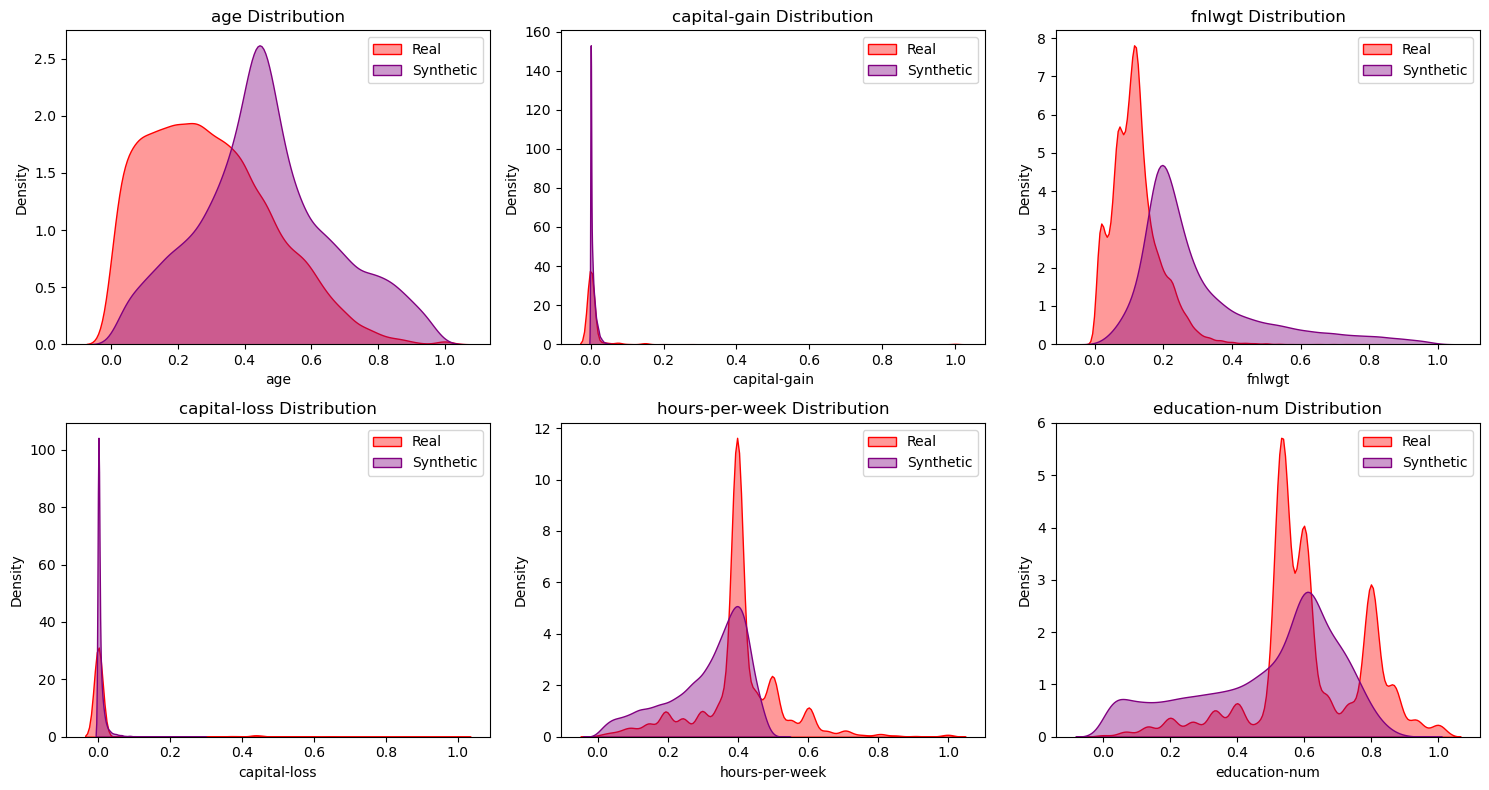

In [ ]:

# Number of columns per row
n_cols = 3
n_plots = len(numerical_columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, numerical_columns):
    sns.kdeplot(
        X_train[col],
        label='Real',
        fill=True,
        alpha=0.4,
        color='red',
        ax=ax
    )
    sns.kdeplot(
        synthetic_regular_dataset[col],
        label='Synthetic',
        fill=True,
        alpha=0.4,
        color='purple',
        ax=ax
    )
    ax.set_title(f"{col} Distribution")
    ax.legend()

# Remove any extra empty subplots
for ax in axes[n_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


##### categorial cols

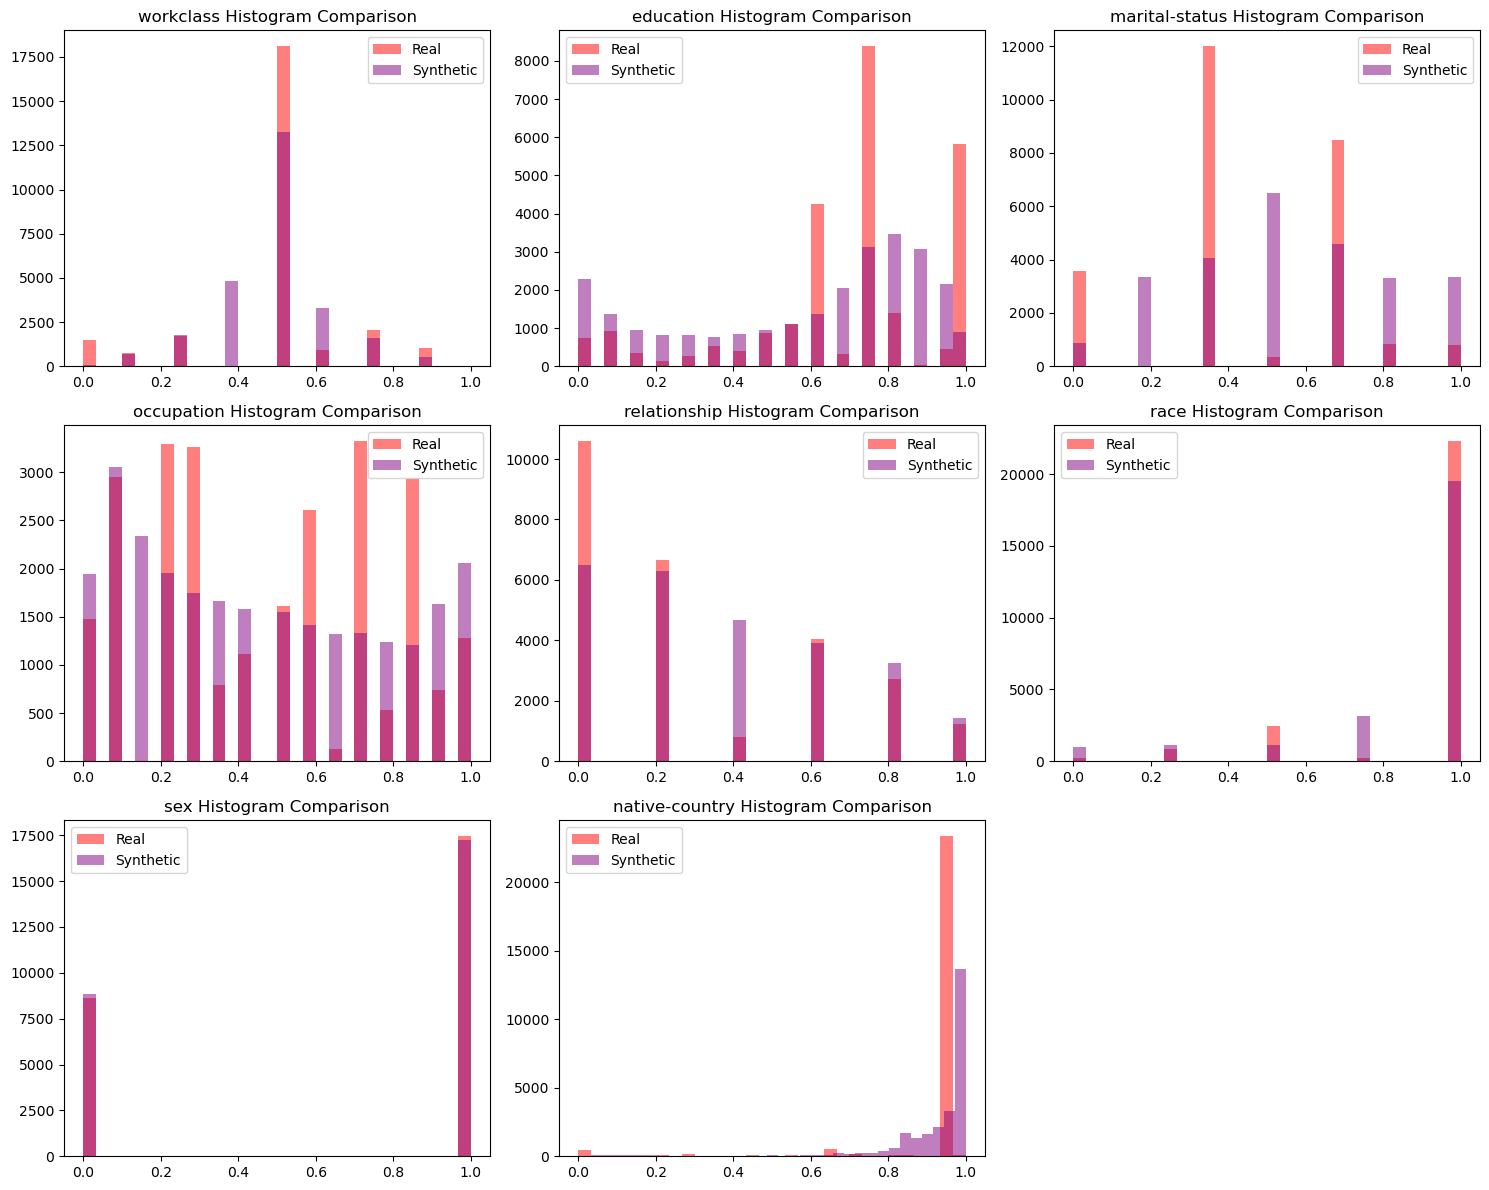

In [ ]:
# `categorical_columns`, `X_train`, and `synthetic_regular_dataset` must be defined already

# Grid layout: 3 plots per row
n_cols  = 3
n_plots = len(categorical_columns)
n_rows  = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, categorical_columns):
    # Real data histogram
    ax.hist(
        X_train[col],
        bins=30,
        alpha=0.5,
        label='Real',
        color='red'
    )
    # Synthetic data histogram
    ax.hist(
        synthetic_regular_dataset[col],
        bins=30,
        alpha=0.5,
        label='Synthetic',
        color='purple'
    )
    
    ax.set_title(f"{col} Histogram Comparison")
    ax.legend()

# Remove any empty subplots
for ax in axes[n_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#### Histograms: Conditioned Data (cGAN Synthesized) and Real Data Distribution Comparison

##### numreical cols

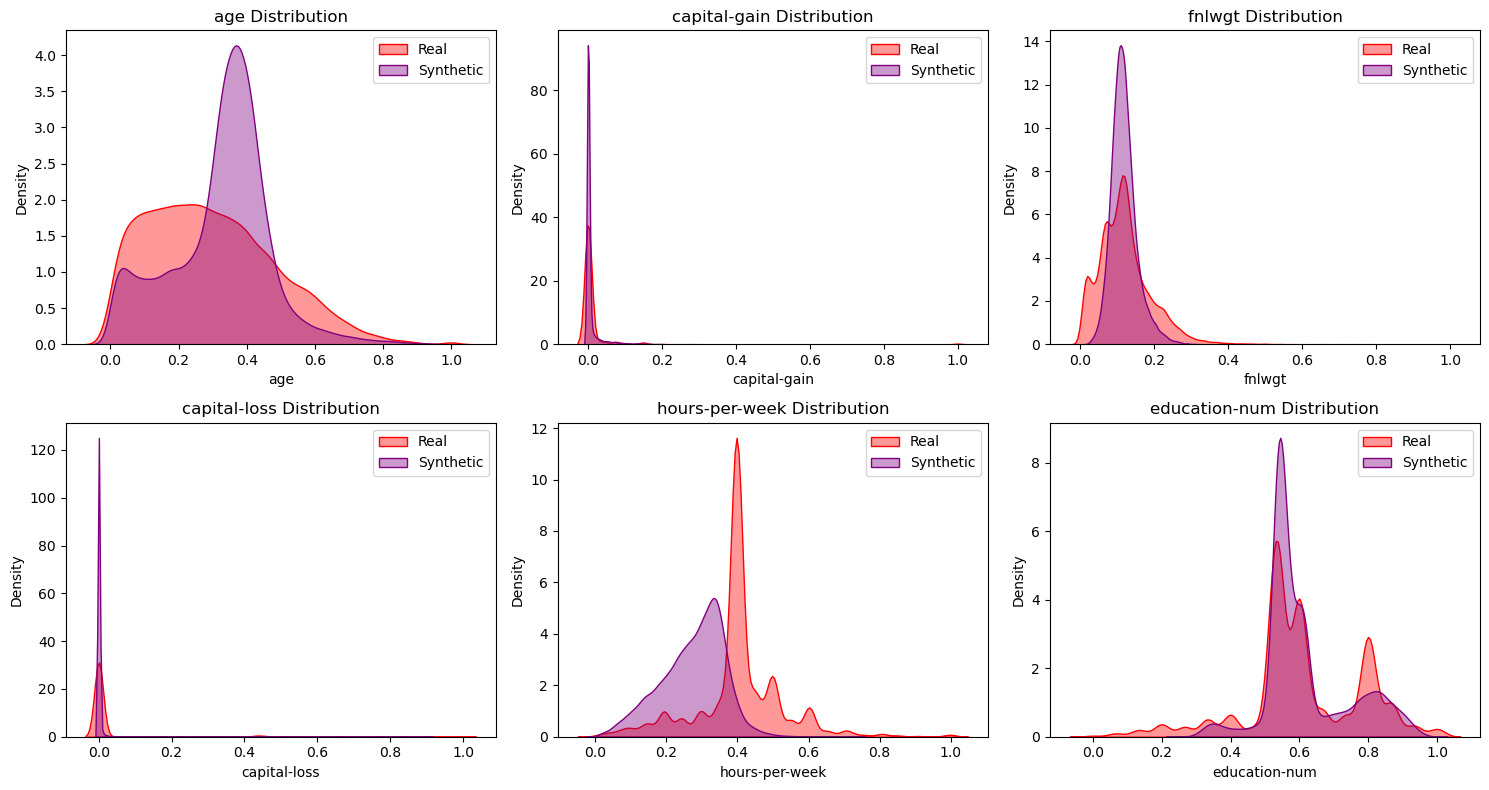

In [40]:

# Number of columns per row
n_cols = 3
n_plots = len(numerical_columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for ax, col in zip(axes, numerical_columns):
    sns.kdeplot(
        X_train[col],
        label='Real',
        fill=True,
        alpha=0.4,
        color='red',
        ax=ax
    )
    sns.kdeplot(
        synthetic_conditional_dataset[col],
        label='Synthetic',
        fill=True,
        alpha=0.4,
        color='purple',
        ax=ax
    )
    ax.set_title(f"{col} Distribution")
    ax.legend()

# Remove any extra empty subplots
for ax in axes[n_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


##### categorial cols

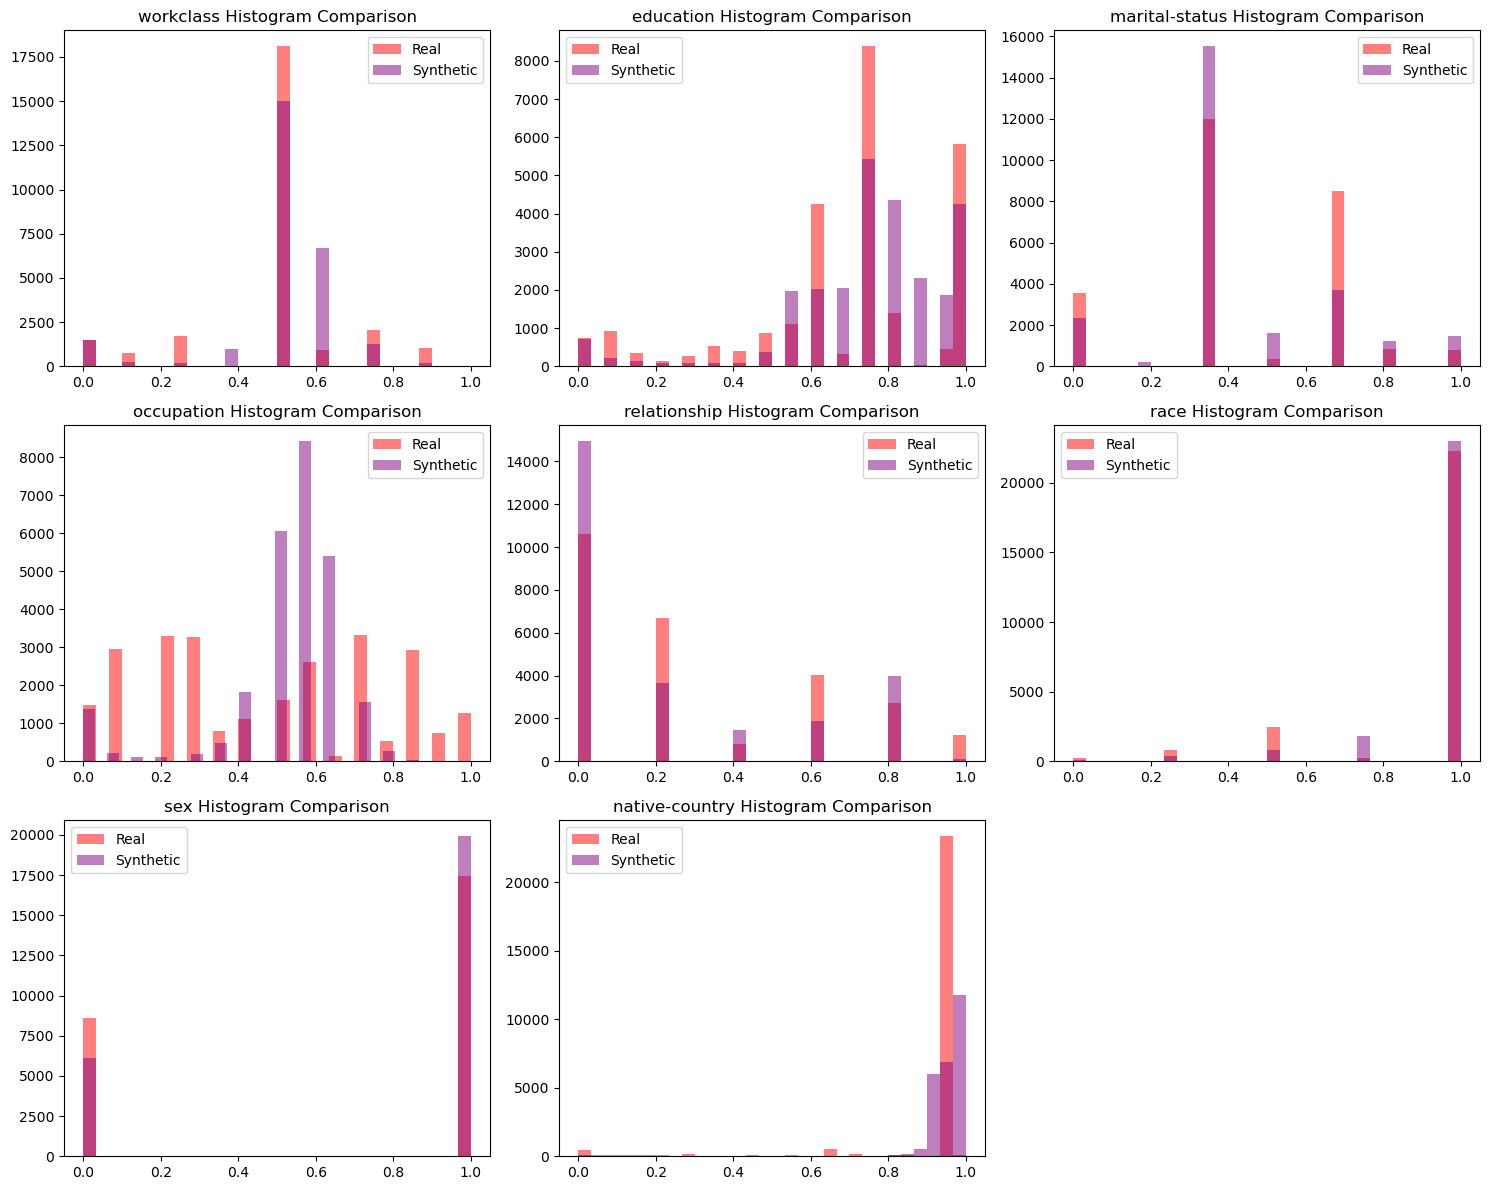

In [41]:
# `categorical_columns`, `X_train`, and `synthetic_regular_dataset` must be defined already

# Grid layout: 3 plots per row
n_cols  = 3
n_plots = len(categorical_columns)
n_rows  = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, categorical_columns):
    # Real data histogram
    ax.hist(
        X_train[col],
        bins=30,
        alpha=0.5,
        label='Real',
        color='red'
    )
    # Synthetic data histogram
    ax.hist(
        synthetic_conditional_dataset[col],
        bins=30,
        alpha=0.5,
        label='Synthetic',
        color='purple'
    )
    
    ax.set_title(f"{col} Histogram Comparison")
    ax.legend()

# Remove any empty subplots
for ax in axes[n_plots:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#### Correlation Matrices: Regular Data (GAN Synthesized) and Real Data

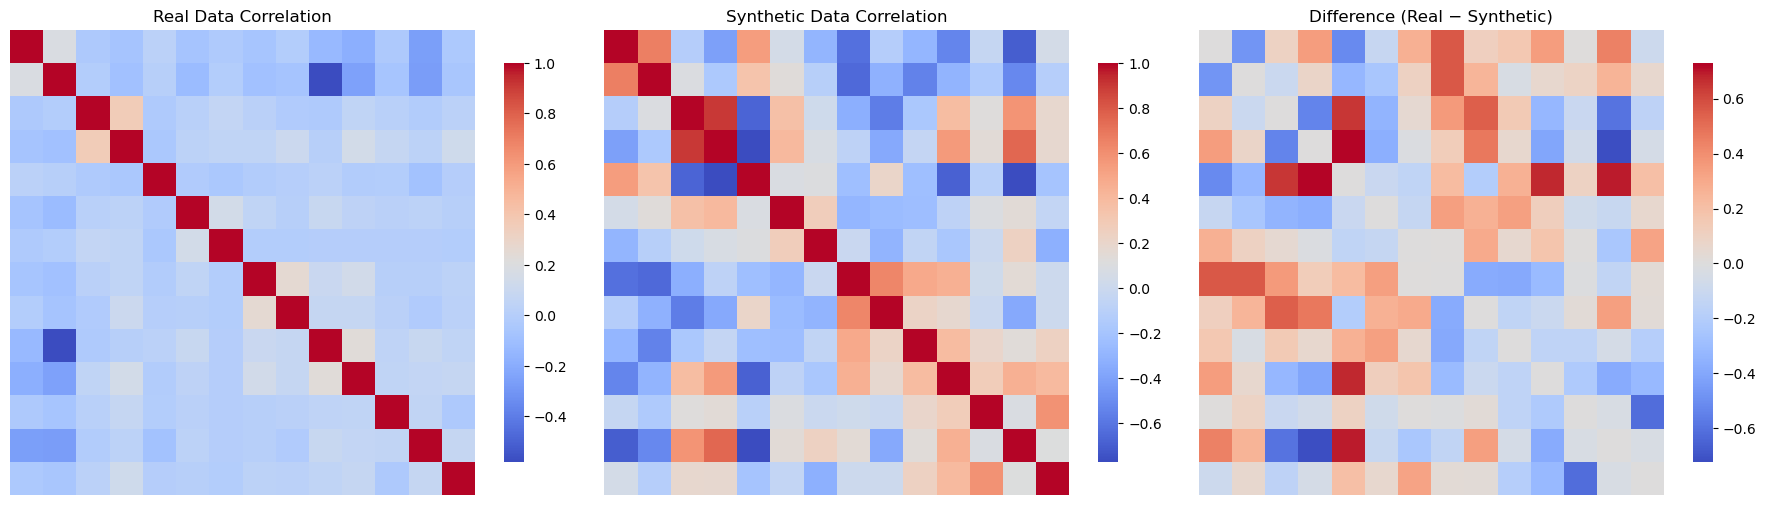

In [45]:
plot_corr_matrices_together(X_train, synthetic_regular_dataset)

#### Correlation Matrices: Conditioned Data (cGAN Synthesized) and Real Data

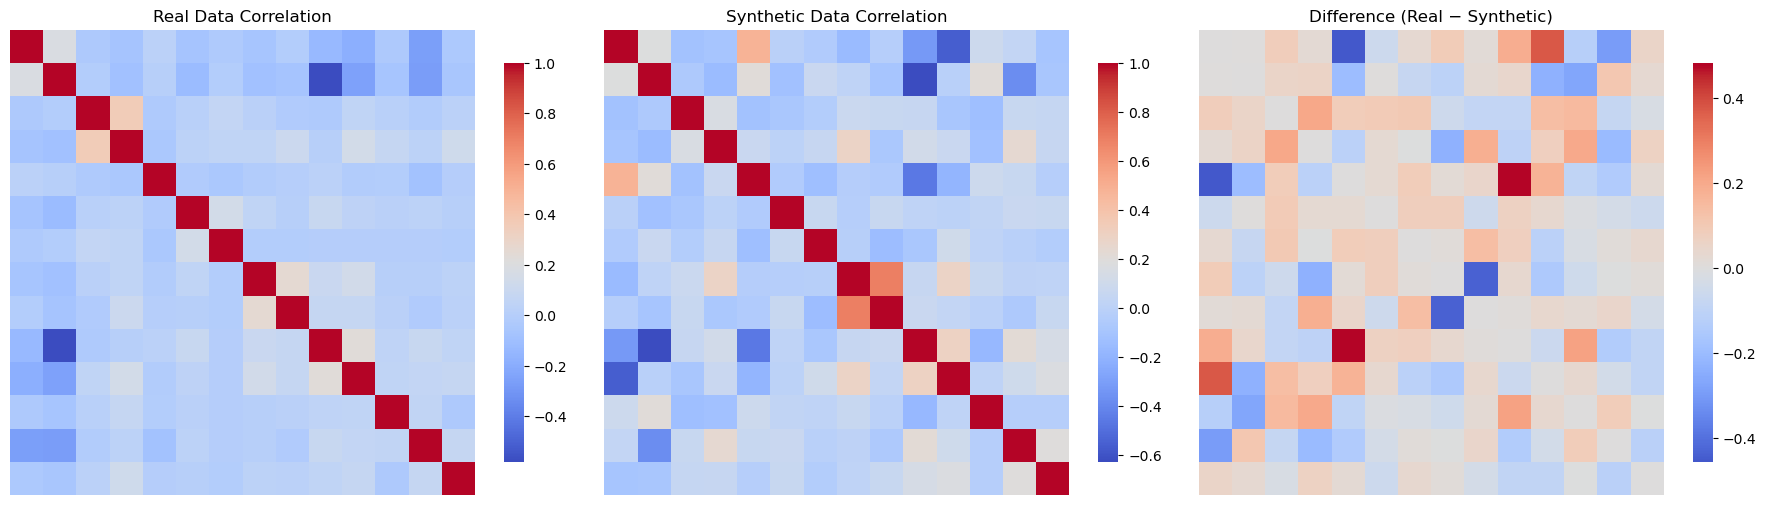

In [46]:
plot_corr_matrices_together(X_train, synthetic_conditional_dataset)


### Performance Evaluation (Detection & Efficacy.)

##### Detection: Regular Data (GAN Synthesized) and Real Data

In [ ]:

# 1) Stack real (1) and synthetic (0) with equal size
X = pd.concat([X_train, synthetic_regular_dataset], axis=0)
y = np.hstack([np.ones(len(X_train)), np.zeros(len(synthetic_regular_dataset))])

# 2) Define 4-fold CV
cv = KFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)

# 3) Instantiate classifier
clf = RandomForestClassifier(n_estimators=50, random_state=RANDOM_SEED)

# 4) Compute AUC for each fold
scores = cross_val_score(
    clf,
    X,
    y,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

# 5) Report
results_df = pd.DataFrame({
    'Fold': np.arange(1, len(scores) + 1),
    'AUC':  scores
})
print("Detection: Real vs. GAN-Synthetic")
print(results_df)



Detection: Real vs. GAN-Synthetic
   Fold  AUC
0     1  1.0
1     2  1.0
2     3  1.0
3     4  1.0


##### Detection: Conditioned Data (cGAN Synthesized) and Real Data

In [64]:
# 1) Ensure real and cGAN‐synthetic sets are same size
assert len(X_train) == len(synthetic_conditional_dataset)

# 2) Stack and label: real=1, synthetic=0
X_all = pd.concat([X_train, synthetic_conditional_dataset], axis=0)
y_all = np.hstack([np.ones(len(X_train)), np.zeros(len(X_train))])

# 3) 4-fold CV setup
cv = KFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)

# 4) Random Forest discriminator
clf = RandomForestClassifier(n_estimators=50, random_state=RANDOM_SEED)

# 5) Compute AUC by fold
scores = cross_val_score(
    clf,
    X_all,
    y_all,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

# 6) Report
results_df = pd.DataFrame({
    'Fold': np.arange(1, len(scores) + 1),
    'AUC':  scores
})
print("Detection: cGAN-Synthetic vs Real")
print(results_df)


Detection: cGAN-Synthetic vs Real
   Fold       AUC
0     1  0.999997
1     2  0.999997
2     3  0.999997
3     4  0.999998


##### Efficacy

In [66]:

# 1) Clean and encode labels once
y_train_clean = pd.to_numeric(y_train, errors="coerce").astype(int).values
y_test_clean  = pd.to_numeric(y_test,  errors="coerce").astype(int).values

# 2) Define a helper to split, train, and score
def train_and_score(X, y, X_test, y_test, seed=RANDOM_SEED):
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    clf = RandomForestClassifier(n_estimators=100, random_state=seed)
    clf.fit(X_tr, y_tr)
    y_proba = clf.predict_proba(X_te)[:, 1]
    auc = roc_auc_score(y_te, y_proba)
    return X_tr.shape, X_te.shape, auc

# 3) Prepare datasets
datasets = {
    "Real":               (X_train,                      y_train_clean),
    "GAN Synthetic":      (synthetic_regular_dataset,    synthetic_labels.values.astype(int)),
    "cGAN Synthetic":     (synthetic_conditional_dataset, synthetic_conditional_labels.values.astype(int)),
}

# 4) Run and collect results
results = {}
for name, (X_df, y_arr) in datasets.items():
    train_shape, test_shape, auc = train_and_score(X_df, y_arr, X_test, y_test_clean)
    results[name] = {
        "train_shape": train_shape,
        "test_shape": test_shape,
        "auc": auc
    }

# 5) Display basic results
for name, info in results.items():
    print(f"{name}: Train {info['train_shape']}, Test {info['test_shape']}, AUC = {info['auc']:.4f}")

# 6) Compute and print efficacy ratios
auc_real = results["Real"]["auc"]
auc_syn  = results["GAN Synthetic"]["auc"]
auc_csyn = results["cGAN Synthetic"]["auc"]

ratio_syn_to_real  = auc_syn  / auc_real
ratio_csyn_to_real = auc_csyn / auc_real

print(f"Regular-synthetic / Real  ratio: {ratio_syn_to_real:.4f}")
print(f"Conditional-synthetic / Real   ratio: {ratio_csyn_to_real:.4f}")





Real: Train (20838, 14), Test (5210, 14), AUC = 0.9006
GAN Synthetic: Train (20838, 14), Test (5210, 14), AUC = 0.4976
cGAN Synthetic: Train (20838, 14), Test (5210, 14), AUC = 0.9876
Regular-synthetic / Real  ratio: 0.5525
Conditional-synthetic / Real   ratio: 1.0965
